In [6]:
import pandas as pd
from elia_hackaton.config import DATA_DIR

# Lecture du fichier CSV
df = pd.read_csv( DATA_DIR / 'final_merged_data.csv')

In [7]:
df

Unnamed: 0  equipmentId  nominalLoad  locationId coolingType  \
0                0     50033827         40.0          26       ONAF1   
1                4     50033827         40.0          26       ONAF1   
2                8     50033827         40.0          26       ONAF1   
3               12     50033827         40.0          26       ONAF1   
4               16     50033827         40.0          26       ONAF1   
...            ...          ...          ...         ...         ...   
249283      997132     50249457         25.0           2       ONAF1   
249284      997136     50249457         25.0           2       ONAF1   
249285      997140     50249457         25.0           2       ONAF1   
249286      997144     50249457         25.0           2       ONAF1   
249287      997148     50249457         25.0           2       ONAF1   

        manufactureYear    commissioningDate enclosure  \
0                  2008  2010-03-17T00:00:00    1 wall   
1                  2008  2010-03-17T00:00:00    1 wall   
2                  2008  2010-03-17T00:00:00    1 wall   
3                  2008  2010-03-17T00:00:00    1 wall   
4                  2008  2010-03-17T00:00:00    1 wall   
...                 ...                  ...       ...   
249283             2011  2016-04-15T00:00:00   4 walls   
249284             2011  2016-04-15T00:00:00   4 walls   
249285             2011  2016-04-15T00:00:00   4 walls   
249286             2011  2016-04-15T00:00:00   4 walls   
249287             2011  2016-04-15T00:00:00   4 walls   

        heatRunTest_noLoadLosses  heatRunTest_copperLosses  ...  \
0                          16.37                    186.51  ...   
1                          16.37                    186.51  ...   
2                          16.37                    186.51  ...   
3                          16.37                    186.51  ...   
4                          16.37                    186.51  ...   
...                          ...                       ...  ...   
249283                      9.50                    106.30  ...   
249284                      9.50                    106.30  ...   
249285                      9.50                    106.30  ...   
249286                      9.50                    106.30  ...   
249287                      9.50                    106.30  ...   

        heatRunTest_x  heatRunTest_y  heatRunTest_h  heatRunTest_gradient  \
0                0.73           1.48           1.13                  11.8   
1                0.73           1.48           1.13                  11.8   
2                0.73           1.48           1.13                  11.8   
3                0.73           1.48           1.13                  11.8   
4                0.73           1.48           1.13                  11.8   
...               ...            ...            ...                   ...   
249283           0.66           1.34           1.10                  14.4   
249284           0.66           1.34           1.10                  14.4   
249285           0.66           1.34           1.10                  14.4   
249286           0.66           1.34           1.10                  14.4   
249287           0.66           1.34           1.10                  14.4   

                   dateTime      load  hotspotTemperature temperature  \
0       2023-04-30T23:00:00  10130.00               40.50       12.26   
1       2023-05-01T00:00:00   9160.97               38.61       11.73   
2       2023-05-01T01:00:00  12049.23               38.77       11.35   
3       2023-05-01T02:00:00  11077.78               38.67       10.80   
4       2023-05-01T03:00:00  11093.11               37.92       10.62   
...                     ...       ...                 ...         ...   
249283  2024-12-31T18:00:00  15281.92               47.47        3.87   
249284  2024-12-31T19:00:00  14497.30               48.05        4.15   
249285  2024-12-31T20:00:00  13493.01               47.65  

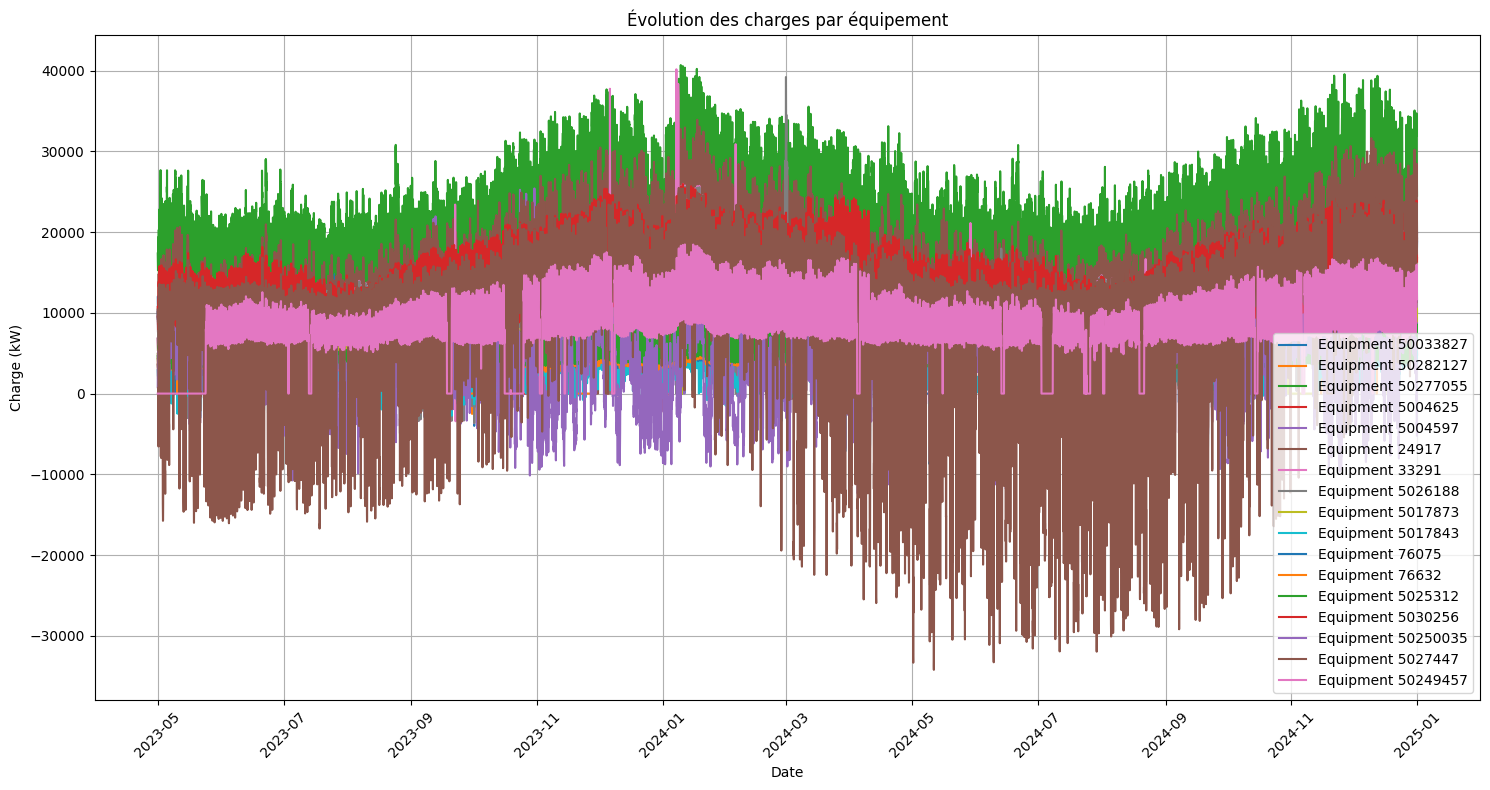

In [5]:
# Grouper par equipmentId et afficher l'évolution des charges
import matplotlib.pyplot as plt

# Créer une figure avec une taille adaptée
plt.figure(figsize=(15,8))

# Pour chaque equipmentId unique
for equipment in df['equipmentId'].unique():
    # Filtrer les données pour cet équipement
    equipment_data = df[df['equipmentId'] == equipment]
    
    # Tracer l'évolution de la charge dans le temps
    plt.plot(pd.to_datetime(equipment_data['dateTime']), 
             equipment_data['load'],
             label=f'Equipment {equipment}')

plt.title("Évolution des charges par équipement")
plt.xlabel("Date")
plt.ylabel("Charge (kW)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


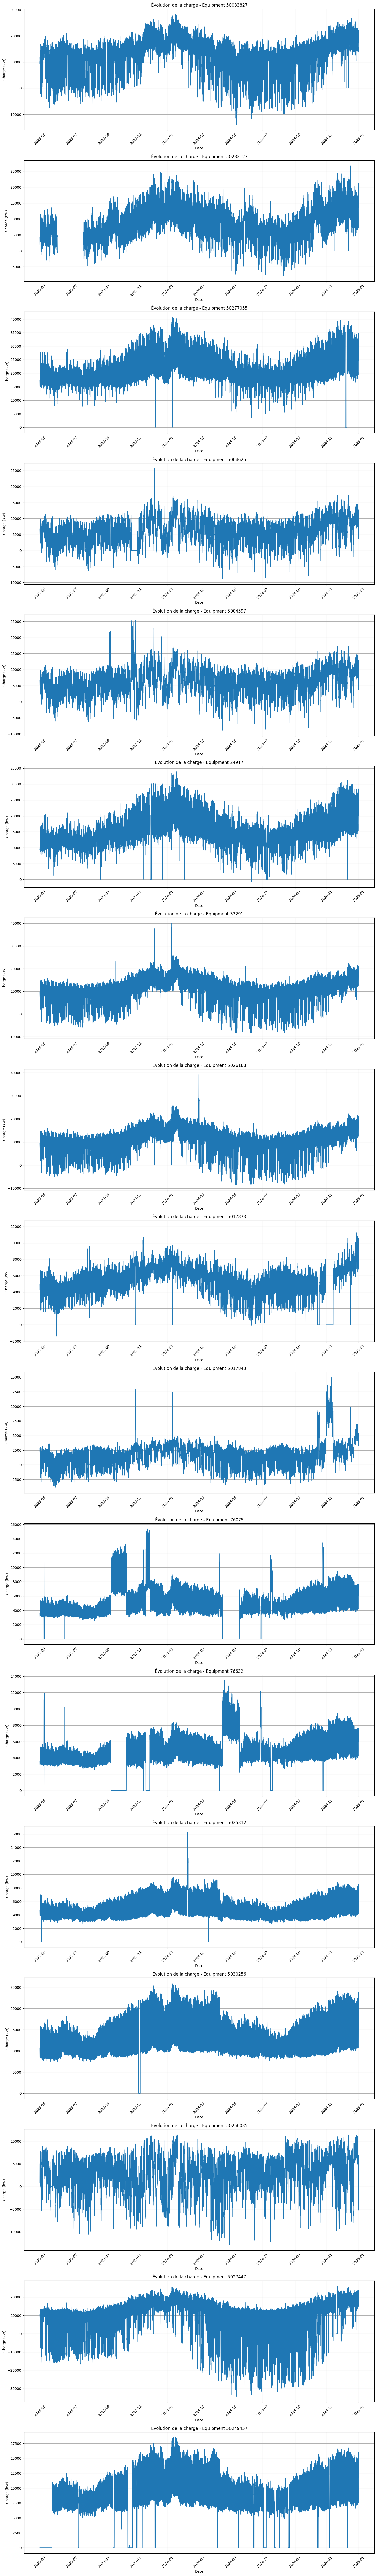

In [6]:
# Grouper par equipmentId et afficher l'évolution des charges
import matplotlib.pyplot as plt

# Obtenir le nombre d'équipements uniques
n_equipment = len(df['equipmentId'].unique())

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(n_equipment, 1, figsize=(15, 6*n_equipment))

# Pour chaque equipmentId unique
for idx, equipment in enumerate(df['equipmentId'].unique()):
    # Filtrer les données pour cet équipement
    equipment_data = df[df['equipmentId'] == equipment]
    
    # Tracer l'évolution de la charge dans le temps sur le sous-graphique correspondant
    axes[idx].plot(pd.to_datetime(equipment_data['dateTime']), 
                  equipment_data['load'])
    
    axes[idx].set_title(f"Évolution de la charge - Equipment {equipment}")
    axes[idx].set_xlabel("Date")
    axes[idx].set_ylabel("Charge (kW)")
    axes[idx].grid(True)
    axes[idx].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

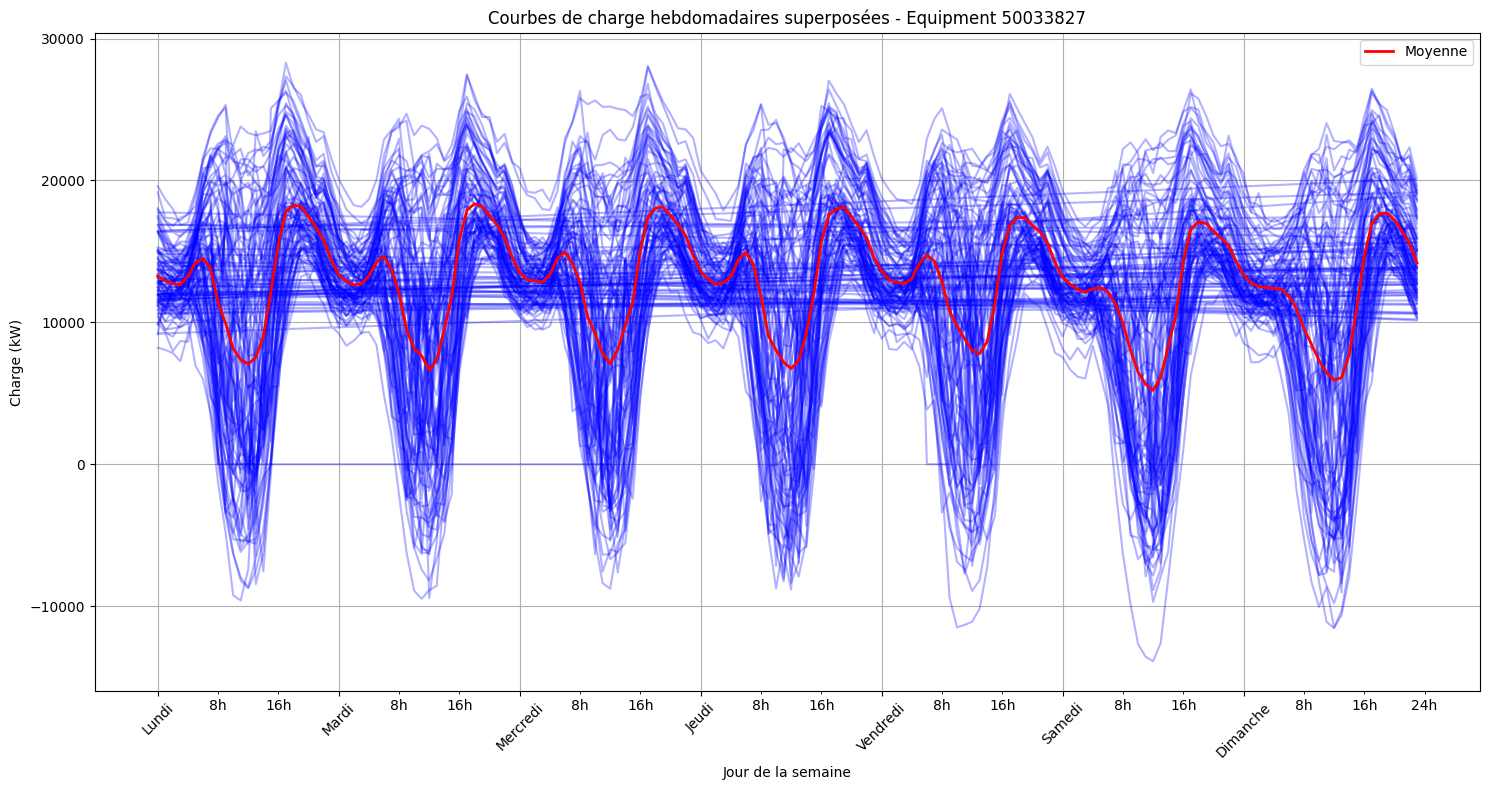

In [9]:
import numpy as np

# Fonction pour afficher les courbes de charge hebdomadaires superposées
def afficher_courbes_hebdo(df, equipment_id):
    # Filtrer les données pour l'équipement sélectionné
    equipment_data = df[df['equipmentId'] == equipment_id].copy()
    
    # Convertir dateTime en datetime si ce n'est pas déjà fait
    equipment_data['dateTime'] = pd.to_datetime(equipment_data['dateTime'])
    
    # Ajouter des colonnes pour le jour de la semaine et l'heure
    equipment_data['jour_semaine'] = equipment_data['dateTime'].dt.dayofweek
    equipment_data['heure'] = equipment_data['dateTime'].dt.hour
    
    # Créer un index combiné jour_semaine + heure (0-167 pour représenter les 168h de la semaine)
    equipment_data['index_hebdo'] = equipment_data['jour_semaine'] * 24 + equipment_data['heure']
    
    # Créer la figure
    plt.figure(figsize=(15, 8))
    
    # Grouper par semaine et tracer chaque semaine
    for nom_semaine, groupe in equipment_data.groupby(equipment_data['dateTime'].dt.isocalendar().week):
        plt.plot(groupe['index_hebdo'], groupe['load'], alpha=0.3, color='blue')
    
    # Calculer et tracer la moyenne
    moyenne_hebdo = equipment_data.groupby('index_hebdo')['load'].mean()
    plt.plot(moyenne_hebdo.index, moyenne_hebdo.values, color='red', linewidth=2, label='Moyenne')
    
    # Personnaliser le graphique
    plt.title(f"Courbes de charge hebdomadaires superposées - Equipment {equipment_id}")
    plt.xlabel("Jour de la semaine")
    plt.ylabel("Charge (kW)")
    
    # Configurer les ticks de l'axe x pour montrer les jours et les heures
    jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    positions_jours = np.arange(0, 168, 24)
    positions_heures = []
    labels_heures = []
    
    for jour in range(7):
        for heure in [8, 16, 24]:
            positions_heures.append(jour * 24 + heure)
            labels_heures.append(f'{heure}h')
            
    plt.xticks(positions_jours, jours, rotation=45)
    plt.xticks(positions_heures, labels_heures, minor=True)
    
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec le premier equipment_id
premier_equipment = df['equipmentId'].unique()[0]
afficher_courbes_hebdo(df, premier_equipment)


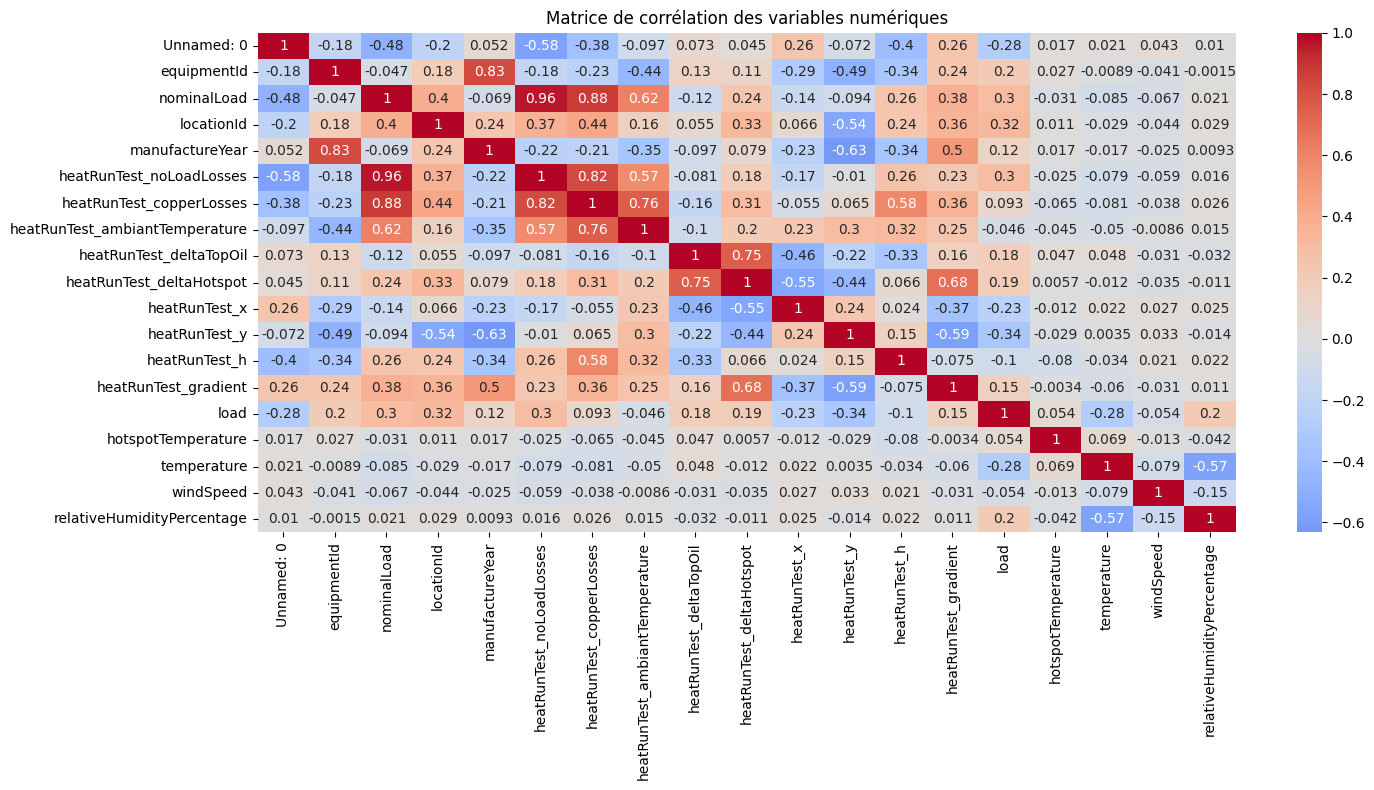

In [11]:
# Créer une matrice de corrélation
plt.figure(figsize=(15, 8))

# Sélectionner uniquement les colonnes numériques
colonnes_numeriques = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[colonnes_numeriques].corr()

# Créer une heatmap avec seaborn
import seaborn as sns
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)

plt.title("Matrice de corrélation des variables numériques")
plt.tight_layout()
plt.show()


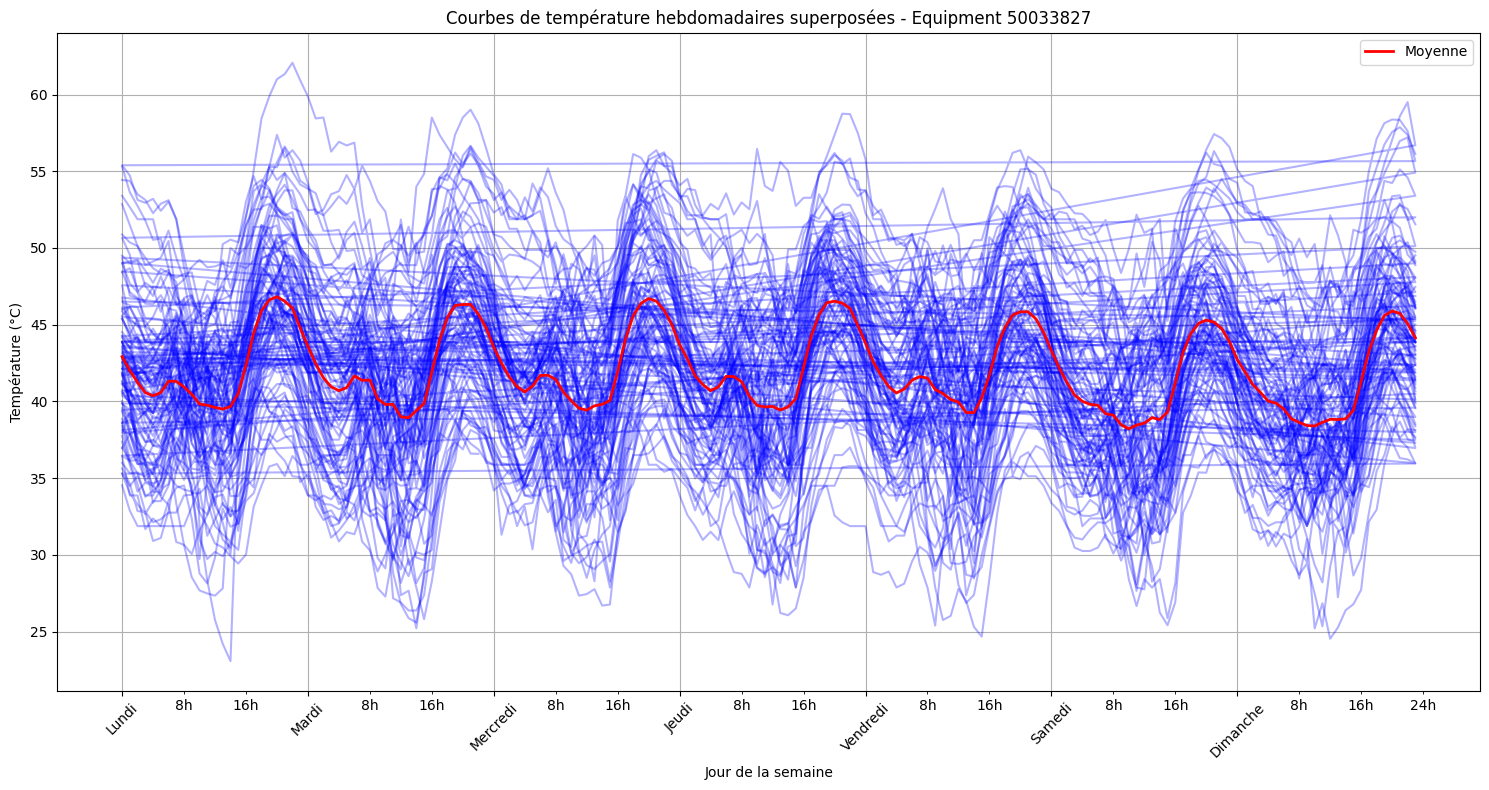

In [12]:
import numpy as np

# Fonction pour afficher les courbes de température hebdomadaires superposées
def afficher_courbes_hebdo(df, equipment_id):
    # Filtrer les données pour l'équipement sélectionné
    equipment_data = df[df['equipmentId'] == equipment_id].copy()
    
    # Convertir dateTime en datetime si ce n'est pas déjà fait
    equipment_data['dateTime'] = pd.to_datetime(equipment_data['dateTime'])
    
    # Ajouter des colonnes pour le jour de la semaine et l'heure
    equipment_data['jour_semaine'] = equipment_data['dateTime'].dt.dayofweek
    equipment_data['heure'] = equipment_data['dateTime'].dt.hour
    
    # Créer un index combiné jour_semaine + heure (0-167 pour représenter les 168h de la semaine)
    equipment_data['index_hebdo'] = equipment_data['jour_semaine'] * 24 + equipment_data['heure']
    
    # Créer la figure
    plt.figure(figsize=(15, 8))
    
    # Grouper par semaine et tracer chaque semaine
    for nom_semaine, groupe in equipment_data.groupby(equipment_data['dateTime'].dt.isocalendar().week):
        plt.plot(groupe['index_hebdo'], groupe['hotspotTemperature'], alpha=0.3, color='blue')
    
    # Calculer et tracer la moyenne
    moyenne_hebdo = equipment_data.groupby('index_hebdo')['hotspotTemperature'].mean()
    plt.plot(moyenne_hebdo.index, moyenne_hebdo.values, color='red', linewidth=2, label='Moyenne')
    
    # Personnaliser le graphique
    plt.title(f"Courbes de température hebdomadaires superposées - Equipment {equipment_id}")
    plt.xlabel("Jour de la semaine")
    plt.ylabel("Température (°C)")
    
    # Configurer les ticks de l'axe x pour montrer les jours et les heures
    jours = ['Lundi', 'Mardi', 'Mercredi', 'Jeudi', 'Vendredi', 'Samedi', 'Dimanche']
    positions_jours = np.arange(0, 168, 24)
    positions_heures = []
    labels_heures = []
    
    for jour in range(7):
        for heure in [8, 16, 24]:
            positions_heures.append(jour * 24 + heure)
            labels_heures.append(f'{heure}h')
            
    plt.xticks(positions_jours, jours, rotation=45)
    plt.xticks(positions_heures, labels_heures, minor=True)
    
    plt.grid(True)
    plt.legend()
    plt.tight_layout()
    plt.show()

# Exemple d'utilisation avec le premier equipment_id
premier_equipment = df['equipmentId'].unique()[0]
afficher_courbes_hebdo(df, premier_equipment)

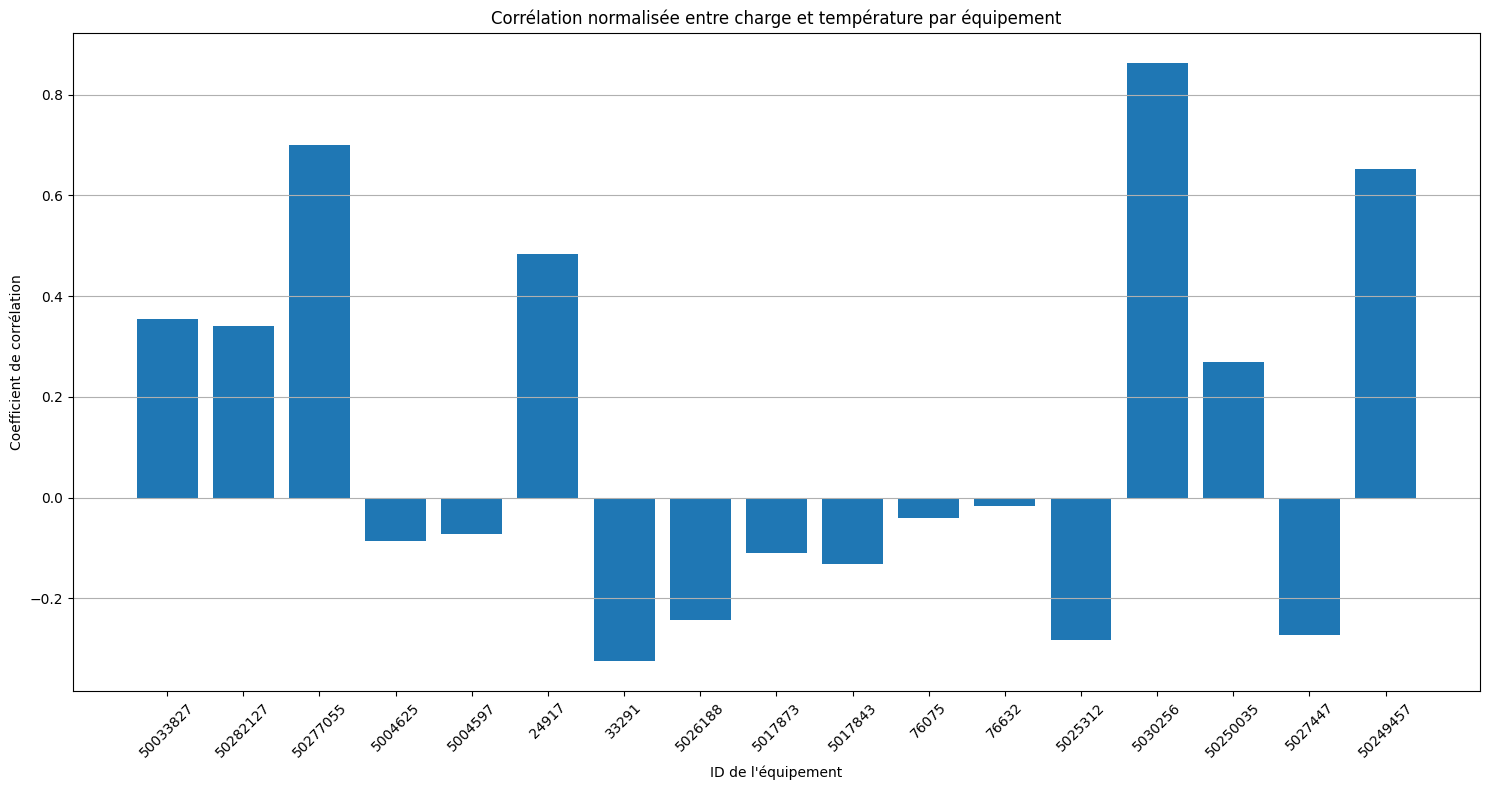


Statistiques des corrélations:
count    17.000000
mean      0.122770
std       0.380557
min      -0.323910
25%      -0.131515
50%      -0.041067
75%       0.354034
max       0.863386
Name: correlation, dtype: float64


In [14]:
# Fonction pour calculer la corrélation normalisée par equipmentId
def correlation_load_temp_par_equipment(df):
    # Créer une liste pour stocker les résultats
    resultats_list = []
    
    # Pour chaque équipement
    for equipment_id in df['equipmentId'].unique():
        # Filtrer les données pour cet équipement
        donnees_equipment = df[df['equipmentId'] == equipment_id]
        
        # Normaliser load et hotspotTemperature
        load_norm = (donnees_equipment['load'] - donnees_equipment['load'].mean()) / donnees_equipment['load'].std()
        temp_norm = (donnees_equipment['hotspotTemperature'] - donnees_equipment['hotspotTemperature'].mean()) / donnees_equipment['hotspotTemperature'].std()
        
        # Calculer la corrélation
        corr = load_norm.corr(temp_norm)
        
        # Ajouter à notre liste de résultats
        resultats_list.append({
            'equipmentId': equipment_id,
            'correlation': corr
        })
    
    # Convertir la liste en DataFrame
    resultats = pd.DataFrame(resultats_list)
    return resultats

# Calculer les corrélations
correlations = correlation_load_temp_par_equipment(df)

# Créer le graphique
plt.figure(figsize=(15, 8))
plt.bar(correlations['equipmentId'].astype(str), correlations['correlation'])
plt.title("Corrélation normalisée entre charge et température par équipement")
plt.xlabel("ID de l'équipement")
plt.ylabel("Coefficient de corrélation")
plt.xticks(rotation=45)
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Afficher les statistiques
print("\nStatistiques des corrélations:")
print(correlations['correlation'].describe())


/var/folders/n9/q8bvx5ln4m10k1kwfc2w0zd40000gn/T/ipykernel_9782/4291412216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_equipment['dateTime'] = pd.to_datetime(donnees_equipment['dateTime'])


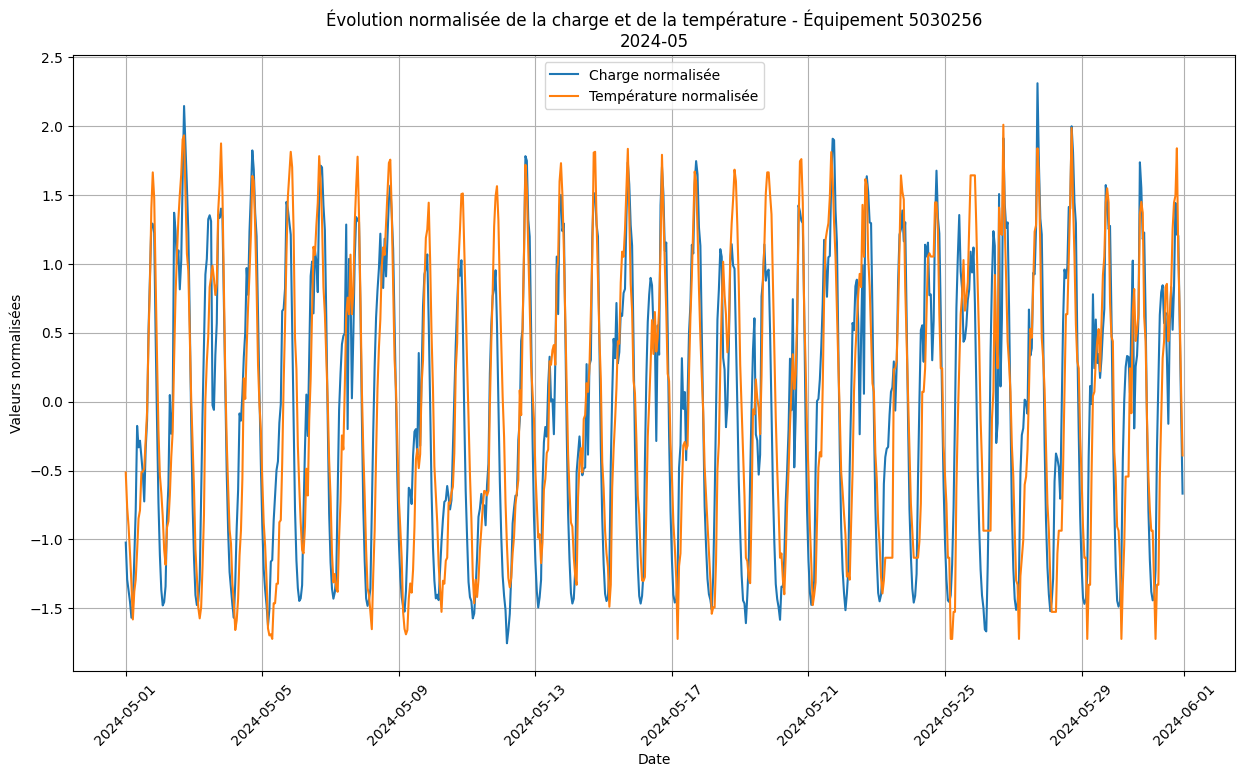

/var/folders/n9/q8bvx5ln4m10k1kwfc2w0zd40000gn/T/ipykernel_9782/4291412216.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  donnees_equipment['dateTime'] = pd.to_datetime(donnees_equipment['dateTime'])


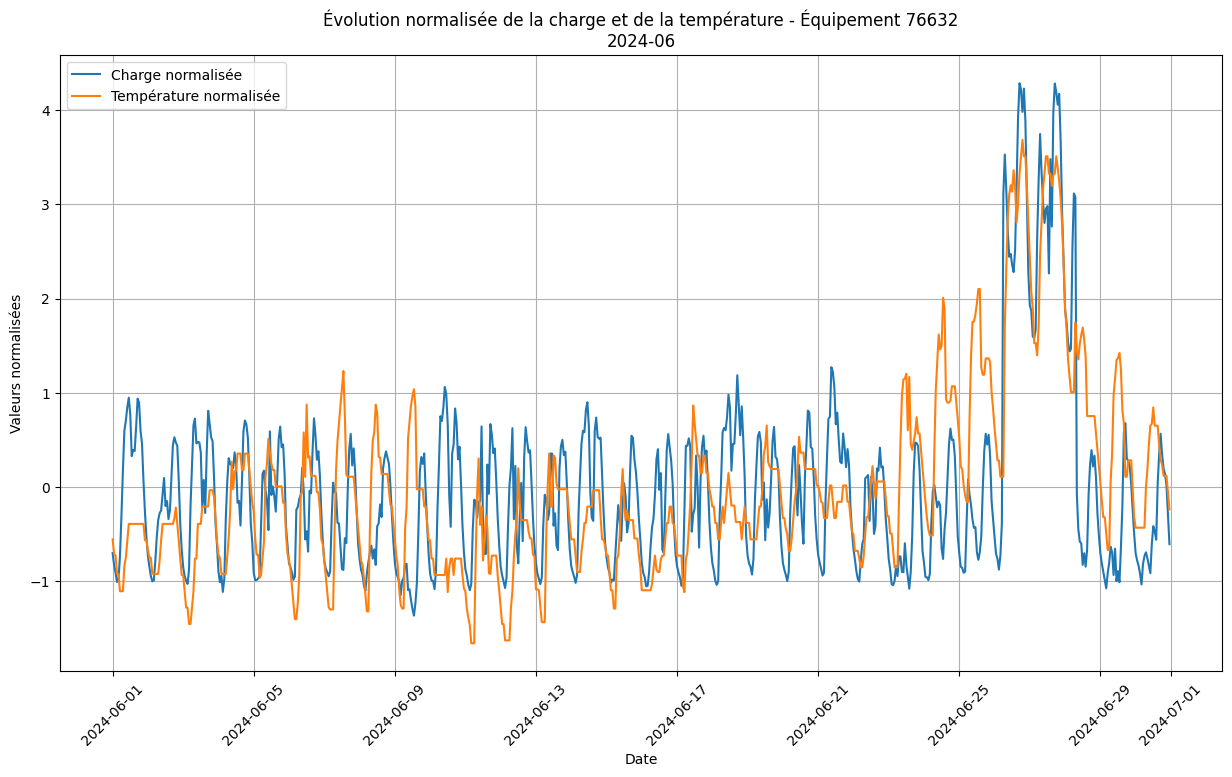

In [16]:
# Fonction pour tracer l'évolution normalisée
def tracer_evolution_normalisee(df, equipment_id):
    # Filtrer les données pour cet équipement
    donnees_equipment = df[df['equipmentId'] == equipment_id]
    
    # Convertir dateTime en datetime
    donnees_equipment['dateTime'] = pd.to_datetime(donnees_equipment['dateTime'])
    
    # Sélectionner un mois aléatoire
    mois_uniques = donnees_equipment['dateTime'].dt.to_period('M').unique()
    mois_aleatoire = np.random.choice(mois_uniques)
    donnees_mois = donnees_equipment[donnees_equipment['dateTime'].dt.to_period('M') == mois_aleatoire]
    
    # Normaliser load et hotspotTemperature
    load_norm = (donnees_mois['load'] - donnees_mois['load'].mean()) / donnees_mois['load'].std()
    temp_norm = (donnees_mois['hotspotTemperature'] - donnees_mois['hotspotTemperature'].mean()) / donnees_mois['hotspotTemperature'].std()
    
    # Créer le graphique
    plt.figure(figsize=(15, 8))
    plt.plot(donnees_mois['dateTime'], load_norm, label='Charge normalisée')
    plt.plot(donnees_mois['dateTime'], temp_norm, label='Température normalisée')
    plt.title(f"Évolution normalisée de la charge et de la température - Équipement {equipment_id}\n{mois_aleatoire}")
    plt.xlabel("Date")
    plt.ylabel("Valeurs normalisées")
    plt.legend()
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.show()

# Tracer pour les deux équipements
tracer_evolution_normalisee(df, 5030256)
tracer_evolution_normalisee(df, 76632)


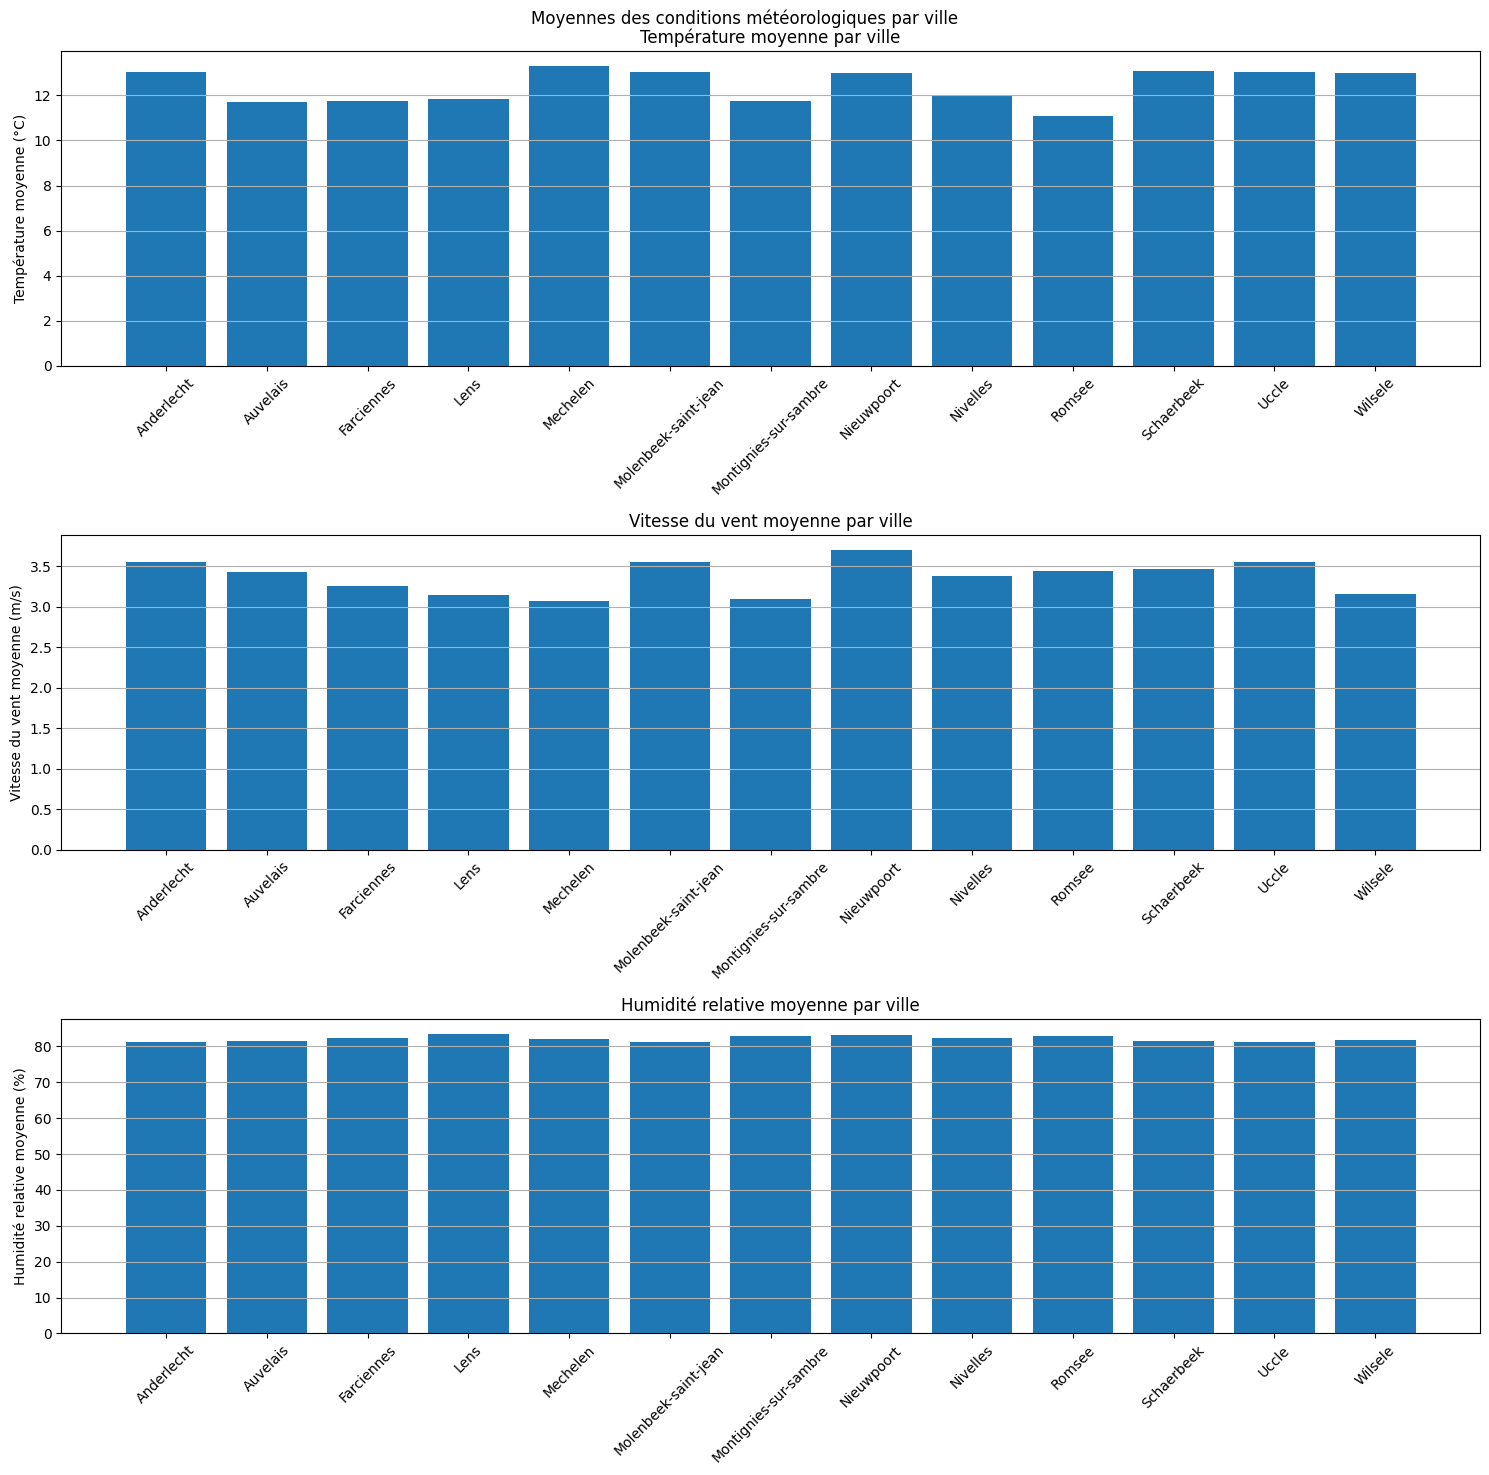

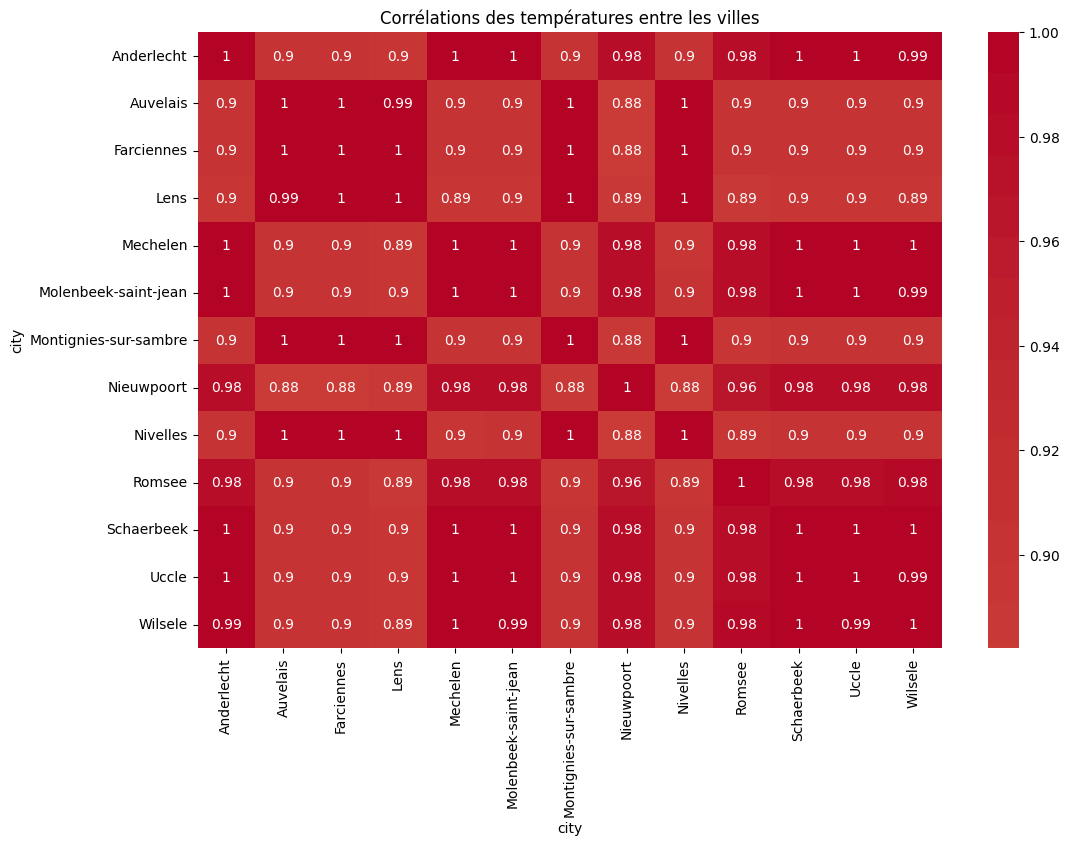

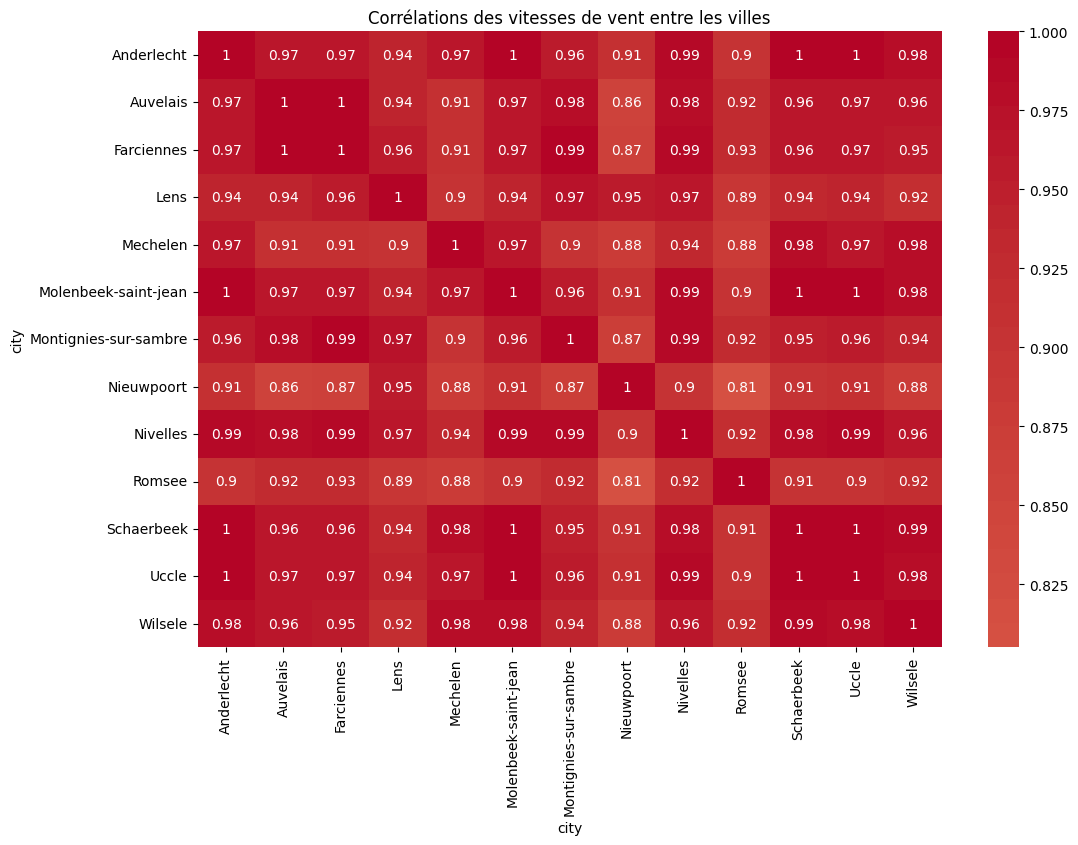

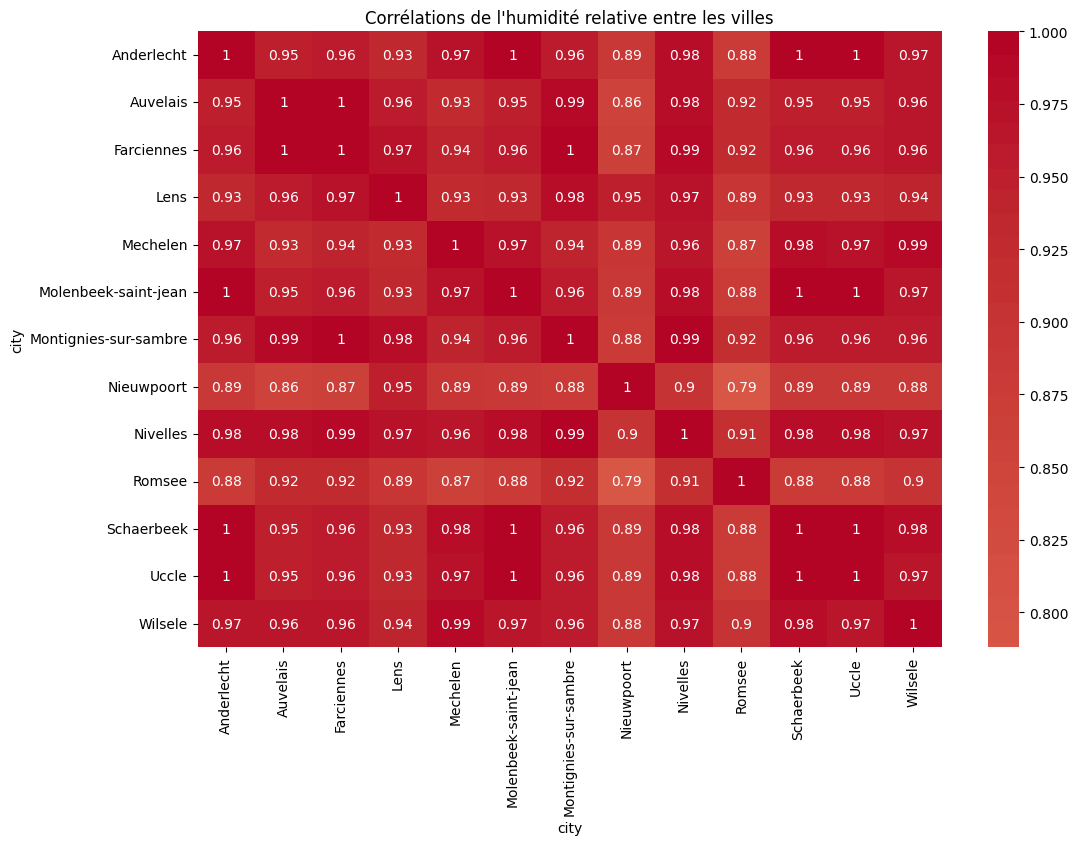

In [20]:
# Charger les données avec les villes
df_cities = pd.read_csv('data/final_merged_data_with_cities.csv')

# Convertir dateTime en datetime
df_cities['dateTime'] = pd.to_datetime(df_cities['dateTime'])

# Calculer les moyennes globales par ville
moyennes_villes = df_cities.groupby('city').agg({
    'temperature': 'mean',
    'windSpeed': 'mean',
    'relativeHumidityPercentage': 'mean'
}).reset_index()

# Créer des subplots pour les graphiques en barres
fig, axes = plt.subplots(3, 1, figsize=(15, 15))
fig.suptitle("Moyennes des conditions météorologiques par ville")

# Température
axes[0].bar(moyennes_villes['city'], moyennes_villes['temperature'])
axes[0].set_ylabel('Température moyenne (°C)')
axes[0].set_title('Température moyenne par ville')
axes[0].grid(True, axis='y')
axes[0].tick_params(axis='x', rotation=45)

# Vitesse du vent
axes[1].bar(moyennes_villes['city'], moyennes_villes['windSpeed'])
axes[1].set_ylabel('Vitesse du vent moyenne (m/s)')
axes[1].set_title('Vitesse du vent moyenne par ville')
axes[1].grid(True, axis='y')
axes[1].tick_params(axis='x', rotation=45)

# Humidité relative
axes[2].bar(moyennes_villes['city'], moyennes_villes['relativeHumidityPercentage'])
axes[2].set_ylabel('Humidité relative moyenne (%)')
axes[2].set_title('Humidité relative moyenne par ville')
axes[2].grid(True, axis='y')
axes[2].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Calculer et afficher les corrélations entre les villes
import seaborn as sns

# Température
temp_pivot = df_cities.pivot_table(index='dateTime', columns='city', values='temperature')
plt.figure(figsize=(12,8))
sns.heatmap(temp_pivot.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Corrélations des températures entre les villes")
plt.show()

# Vitesse du vent
wind_pivot = df_cities.pivot_table(index='dateTime', columns='city', values='windSpeed')
plt.figure(figsize=(12,8))
sns.heatmap(wind_pivot.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Corrélations des vitesses de vent entre les villes")
plt.show()

# Humidité relative
humidity_pivot = df_cities.pivot_table(index='dateTime', columns='city', values='relativeHumidityPercentage')
plt.figure(figsize=(12,8))
sns.heatmap(humidity_pivot.corr(), annot=True, cmap='coolwarm', center=0)
plt.title("Corrélations de l'humidité relative entre les villes")
plt.show()


In [ ]:
# Analyse causale des facteurs influençant la température

import numpy as np
from tigramite import data_processing as pp
from tigramite import plotting as tp
from tigramite.pcmci import PCMCI
from tigramite.independence_tests import ParCorr
from lingam import DirectLiNGAM
import networkx as nx

# Créer un dataframe avec les variables d'intérêt
df_causal = df_cities[['temperature', 'windSpeed', 'relativeHumidityPercentage', 'dateTime']]

# Ajouter des variables temporelles
df_causal['heure'] = df_causal['dateTime'].dt.hour
df_causal['mois'] = df_causal['dateTime'].dt.month
df_causal['jour'] = df_causal['dateTime'].dt.day

# Préparer les données pour l'analyse causale
variables = ['temperature', 'windSpeed', 'relativeHumidityPercentage', 'heure', 'mois']
data = df_causal[variables].values
var_names = variables

# 1. PC Algorithm avec Tigramite
dataframe = pp.DataFrame(data, 
                        datatime = np.arange(len(data)), 
                        var_names=var_names)

pcmci = PCMCI(dataframe=dataframe, 
              cond_ind_test=ParCorr(),
              verbosity=1)

# Exécuter l'algorithme PC
pc_alpha = 0.05
results = pcmci.run_pc_stable(pc_alpha=pc_alpha)

# Visualiser le graphe PC
plt.figure(figsize=(10,8))
tp.plot_graph(
    val_matrix=results['graph'],
    var_names=var_names,
    link_colorbar_label='Cross-MCI',
    node_colorbar_label='Auto-MCI',
    title="Graphe de causalité PC"
)
plt.show()

# 2. LiNGAM Analysis
model = DirectLiNGAM()
model.fit(data)

# Créer un graphe dirigé pour LiNGAM
G = nx.DiGraph()
for i in range(len(var_names)):
    G.add_node(var_names[i])
    
for i in range(len(var_names)):
    for j in range(len(var_names)):
        if model.adjacency_matrix_[i,j] != 0:
            G.add_edge(var_names[i], var_names[j], 
                      weight=abs(model.adjacency_matrix_[i,j]))

# Visualiser le graphe LiNGAM
plt.figure(figsize=(12,8))
pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, node_color='lightblue', 
        node_size=1500, font_size=10, font_weight='bold',
        arrows=True, edge_color='gray')
plt.title("Graphe de causalité LiNGAM")
plt.show()

# 3. Granger Causality
from statsmodels.tsa.stattools import grangercausalitytests

# Matrice pour stocker les résultats du test de Granger
granger_results = np.zeros((len(variables), len(variables)))

# Effectuer les tests de causalité de Granger
for i in range(len(variables)):
    for j in range(len(variables)):
        if i != j:
            data_i = df_causal[variables[i]]
            data_j = df_causal[variables[j]]
            try:
                result = grangercausalitytests(np.column_stack((data_i, data_j)), maxlag=5, verbose=False)
                # Prendre la p-value du test F pour le premier lag
                granger_results[i,j] = result[1][0]['ssr_chi2test'][1]
            except:
                granger_results[i,j] = 1.0

# Visualiser les résultats de Granger
plt.figure(figsize=(10,8))
sns.heatmap(granger_results, annot=True, xticklabels=variables, 
            yticklabels=variables, cmap='coolwarm')
plt.title("Matrice de causalité de Granger (p-values)")
plt.show()

# Synthèse des résultats
print("\nSynthèse des relations causales détectées:")
print("\nPC Algorithm:")
for i in range(len(var_names)):
    for j in range(len(var_names)):
        if results['graph'][i,j] != 0:
            print(f"{var_names[i]} -> {var_names[j]}")

print("\nLiNGAM:")
for (i,j) in G.edges():
    print(f"{i} -> {j}")

print("\nGranger Causality (relations significatives p<0.05):")
for i in range(len(variables)):
    for j in range(len(variables)):
        if granger_results[i,j] < 0.05:
            print(f"{variables[i]} -> {variables[j]}")


ImportError: cannot import name 'ParCorr' from 'tigramite.independence_tests' (/Users/melihtaki/Library/Python/3.9/lib/python/site-packages/tigramite/independence_tests/__init__.py)